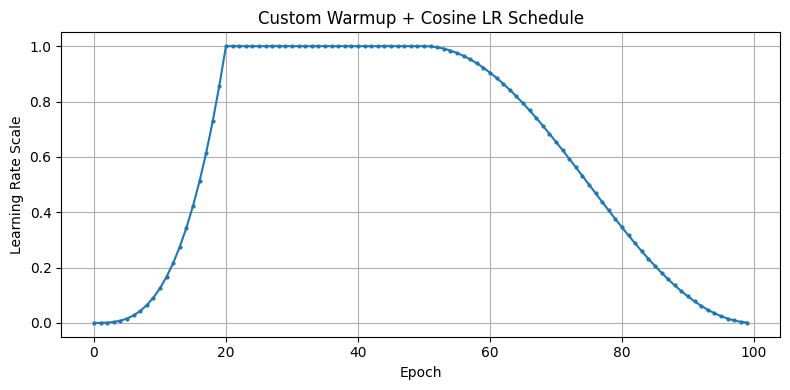

In [1]:
import matplotlib.pyplot as plt
import math

def custom_warmup_cosine_schedule(total_epochs, warmup_ratio=0.1, peak_ratio=0.3, warmup_pow=2.0):
    lrs = []
    for epoch in range(total_epochs):
        if epoch < total_epochs * warmup_ratio:
            progress = epoch / (total_epochs * warmup_ratio)
            lr_scale = progress**warmup_pow
        elif epoch < total_epochs * peak_ratio:
            lr_scale = 1.0
        else:
            progress = (epoch - total_epochs * peak_ratio) / (total_epochs * (1 - peak_ratio))
            lr_scale = 0.5 * (1 + math.cos(math.pi * progress))
        lrs.append(lr_scale)
    return lrs

# 예시 파라미터
epochs = 100
lrs = custom_warmup_cosine_schedule(total_epochs=epochs, warmup_ratio=0.2, peak_ratio=0.5, warmup_pow=3.0)

# 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(epochs), lrs, marker='o', markersize=2)
plt.title("Custom Warmup + Cosine LR Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate Scale")
plt.grid(True)
plt.tight_layout()
plt.show()